# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [10]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [11]:
# Display a description of the dataset
description = data.describe()
display(description)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

=== Exploring the Data ===
Box Plot to check how data is distributing across attributes.


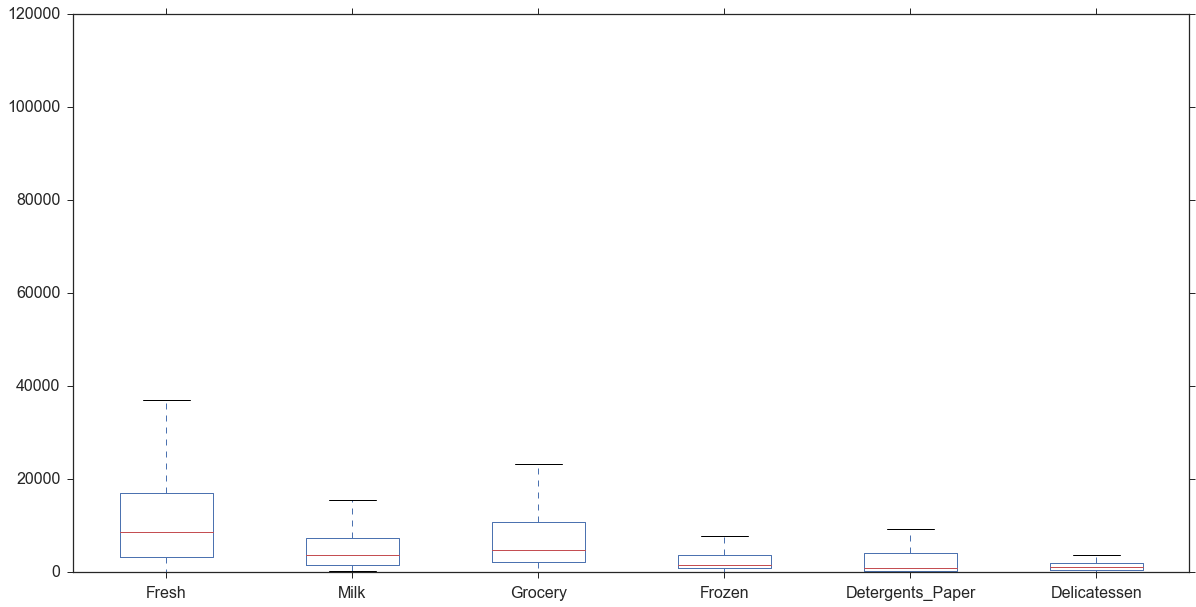

-------------------
Scatter Matrix to check how each attribute relates to another in the distribution.


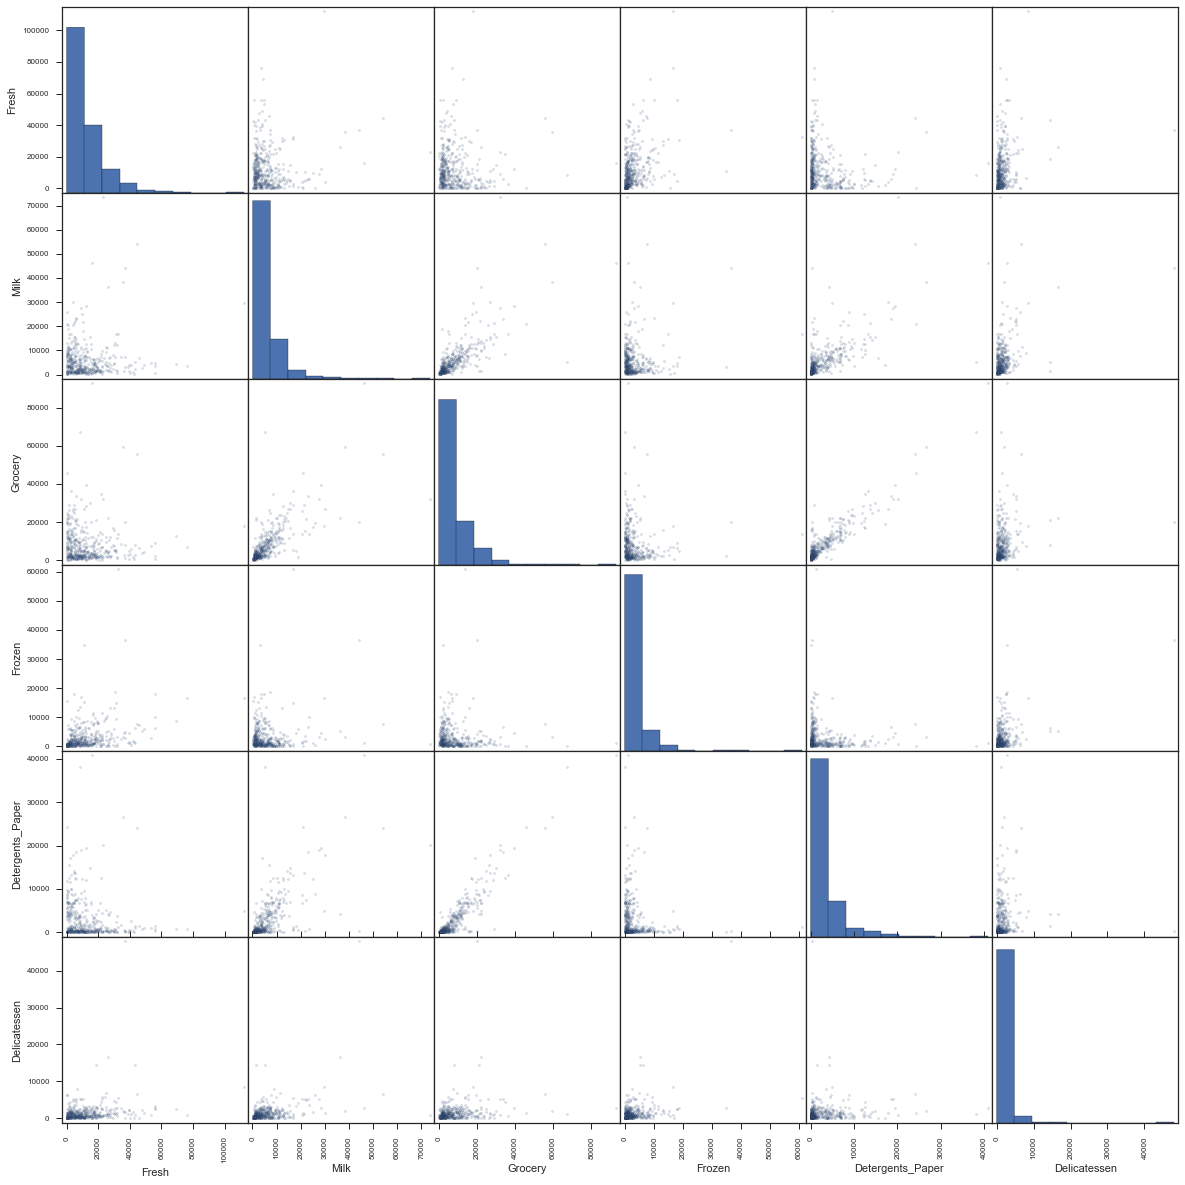

-------------------
Simple correlation to show what attributes usually scale together with what other attribute.


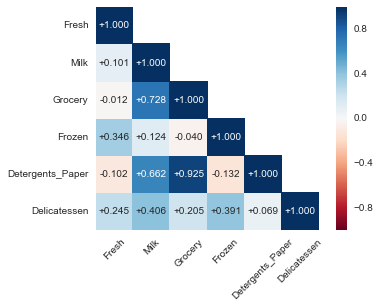

-------------------
Top 10 rows with the highest skeweness of distribution among attributes.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,112151,29627,18148,16745,4948,8550
125,76237,3473,7102,16538,778,918
284,68951,4411,12609,8692,751,2406
86,22925,73498,32114,987,20070,903
47,44466,54259,55571,7782,24171,6465
39,56159,555,902,10002,212,2916
258,56083,4563,2124,6422,730,3321
103,56082,3504,8906,18028,1480,2498
259,53205,4959,7336,3012,967,818
85,16117,46197,92780,1026,40827,2944


In [12]:
import matplotlib.pyplot as plt
import copy
from pandas.tools.plotting import scatter_matrix
import seaborn as sns

print "=== Exploring the Data ==="

#Data Exploration
print "Box Plot to check how data is distributing across attributes."
data.plot(kind='box', fontsize=16, figsize=(20,10))
#data.plot(kind='hist', fontsize=16, figsize=(20,10), subplots=True)
plt.show()

print "-------------------"
print "Scatter Matrix to check how each attribute relates to another in the distribution."
a = scatter_matrix(data, alpha=0.2, figsize=(20,20))
plt.show()

print "-------------------"
print "Simple correlation to show what attributes usually scale together with what other attribute."
# correlations = data.corr(method='pearson',  min_periods=5)
# display(correlations)
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')
plt.show()

    
# Creates a copy of the dataset with variance from the mean of each attribute
means = data.describe().loc['mean']
df = (data - means) ** 2

# We trace a line between the amount of sales in each row so we can get the Slope of this line
df['Slope'] = 0
x_values = list(range(1, len(df.columns)))
def slope_per_row(row_):
    row_['Slope'] = np.absolute(np.polyfit(x_values, list(row_[data.columns]), deg=1))[0]
    return row_
    
df = df.apply(slope_per_row, axis=1).sort_values(by='Slope', axis=0, ascending=False)

# We now take a look in the slopes that are the most steep, 
# with the largest differences in distribution among parameters, 
# so we can pick interesting samples to test later
print "-------------------"
print "Top 10 rows with the highest skeweness of distribution among attributes."
display(data.loc[df.head(10).index])
    

In [13]:
# Select three indices of your choice you wish to sample from the dataset
indices = [181, 85, 47]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,16117,46197,92780,1026,40827,2944
2,44466,54259,55571,7782,24171,6465


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

*Sample 0 has all features except Detergents_Paper are way above the mean, way into the 4th quartile, with a speciaally big quantity of Fresh, almost 10x the mean - it is, in fact, the highest amount of Fresh expenditures in our database. That denotes very high volumes compatible with a big "fresh market" or fast-food chains, where the amount of Fresh products and Milk products like cheese are proportionally much more represented.  *

*Sample 1 has Milk, Grocery and Detergents_Paper in very high volumes way into the 4th quartile, with proportionally much less Fresh and Frozen, which are close to the mean. The expenditures seem consistent with a big "convenience store" chain or something similar, which tends to sell or utilize much less Fresh and Frozen foods. *

*Sample 2 looks a lot like a big supermarket: selling a bit of everything and selling Detergents and Paper alongside food. The amount of expenditures is high across all features, as they are all in the 4th quartile, but Milk, Groceries and cleaning products are proportionally even higher, on several standard deviations above the mean.*


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import f1_score

randomstate = 25114

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
column_to_drop = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']

for c in column_to_drop:
    new_data = data.drop(c, axis=1)    

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[c], test_size=0.25, random_state=randomstate)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=randomstate)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print c + ': ' + str(score)

Fresh: -1.46304449319
Milk: 0.596267253355
Grocery: 0.77138430017
Frozen: -0.129406272068
Detergents_Paper: 0.691043023862
Delicatessen: 0.11204917895


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

*I tested all features and the ones with positive results are "Grocery" (0.77), "Milk" (0.59), "Detergents_Paper" (0.69) and "Delicatessen" (0.11) - which is consistent with some of the information gathered in my data exploration, where it showed strong correlations between the first 3. *

*From the scores it seems can use "Grocery", "Milk",  "Detergents_Paper" and "Delicatessen" to predict spending behavior. Delicatessen could provide more information on predictions, as its R^2 is lower and less correlated to any one specific feature.*

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

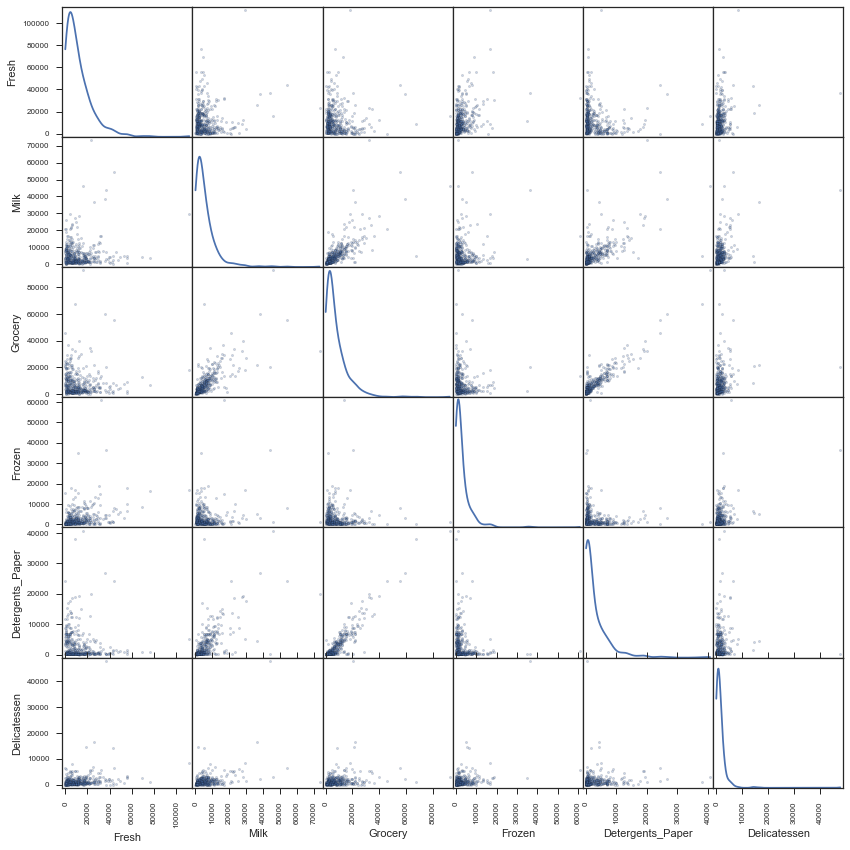

In [15]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,14), diagonal = 'kde');
plt.show()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

*I had done the scatter matrix in the beginning and made some considerations above, but to recap:*
- *The strongest correlations are where the distribution tends to follow a 45o degrees line, between Milk vs. Grocery, Grocery vs. Detergents_Paper and, probably by consequence, Milk vs. Detergents_Paper.*
- *These correlations are likely due to a big presence of supermarkets and convenience stores.*

*The data of all features are distributed in a "long-tail" pattern, or what seems to be a Poisson distribution with low lambda. *

*Most of data lies in a very limited range, between 0 and 10,000 (for most features). But, beyond that, there are a lot of strong outliers. In the box plot, we can see many of them beyond the upper adjacent. *

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

Visualizing the Distribution of Features before log transformation.


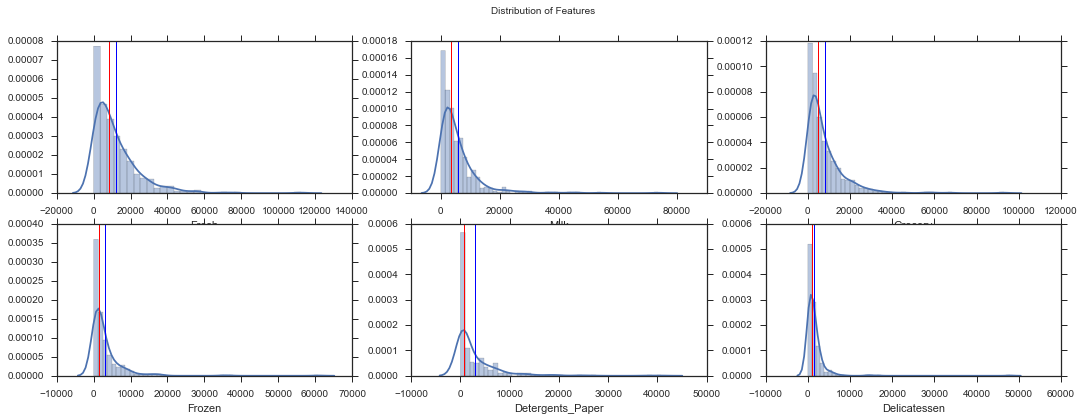

-------------------
Plotting the Scatter Matrix.


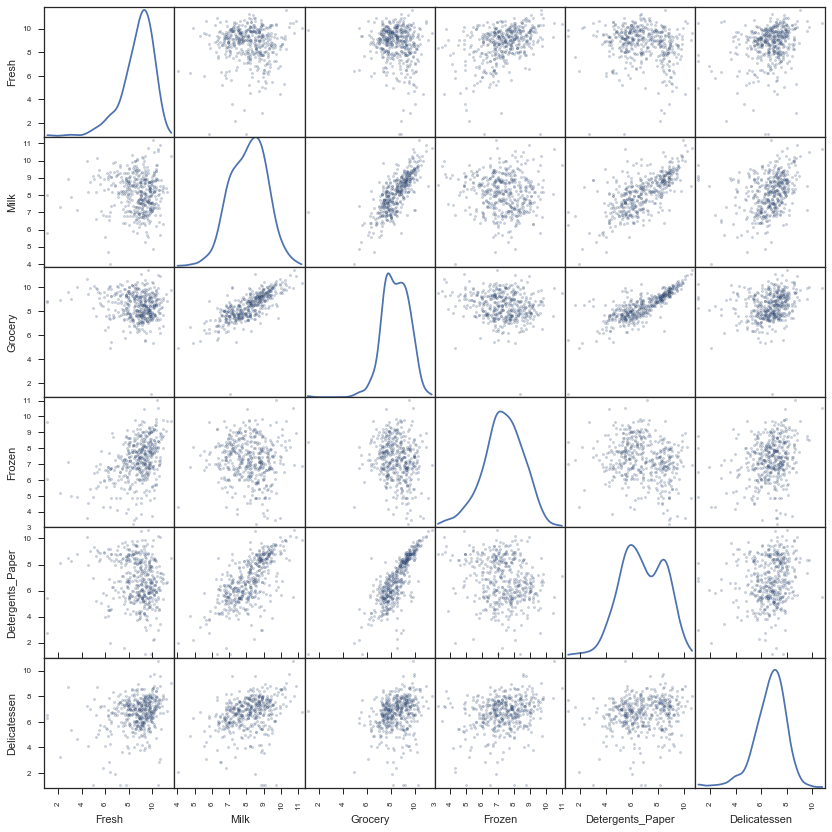

-------------------
Visualizing the Distribution of Features AFTER log transformation.


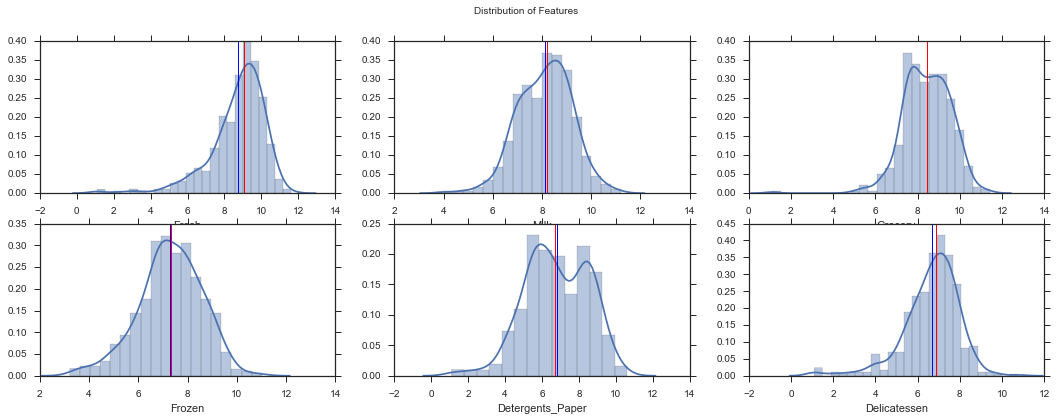

-------------------
Comparing log transformations on top of each other.


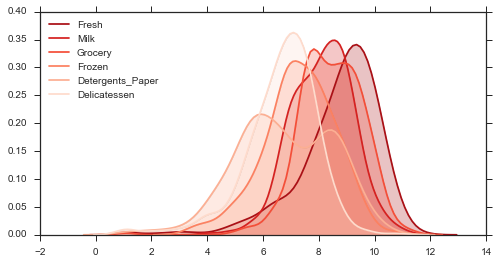

In [16]:
def plot_distribution_of_features(dataset_, xlim_=False):
    fig, axes = plt.subplots(2, 3)
    axes = axes.flatten()
    fig.set_size_inches(18, 6)
    fig.suptitle('Distribution of Features')
    for i, col in enumerate(dataset_.columns):
        feature = dataset_[col]
        if xlim_:
            sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
        else:
            sns.distplot(feature, label=col, ax=axes[i])
        axes[i].axvline(feature.mean(),linewidth=1)
        axes[i].axvline(feature.median(),linewidth=1, color='r')
    plt.show()

print "Visualizing the Distribution of Features before log transformation."
plot_distribution_of_features(data)

# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log, axis=0)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(np.log, axis=0)

# Produce a scatter matrix for each pair of newly-transformed features
print "-------------------"
print "Plotting the Scatter Matrix."
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,14), diagonal = 'kde');
plt.show()

print "-------------------"
print "Visualizing the Distribution of Features AFTER log transformation."
plot_distribution_of_features(log_data)

print "-------------------"
print "Comparing log transformations on top of each other."
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')
plt.show()

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [17]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
1,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
2,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [18]:
all_outliers_ids = set([])
repeated_outliers_ids = set([])

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    iqr = Q3 - Q1
    step = iqr * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers)
    
    # Do outlier operations to find the ones that are repeating over the feature list
    outliers_ids = set(outliers.index.tolist())
    intersection = outliers_ids & all_outliers_ids
    repeated_outliers_ids = repeated_outliers_ids | intersection
    all_outliers_ids = all_outliers_ids | outliers_ids   
        
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = list(repeated_outliers_ids)
print "=== Outliers to be removed: ==="
print outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


=== Outliers to be removed: ===
[128, 65, 66, 154, 75]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

*I believe we should remove all outliers that affect 2 or more features, because they can heavily skew our learning towards the features it is affecting.*

*For the single-feature outliers, I believe I would try to keep them because we already did the log transformation to counter their effect on learning.*

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

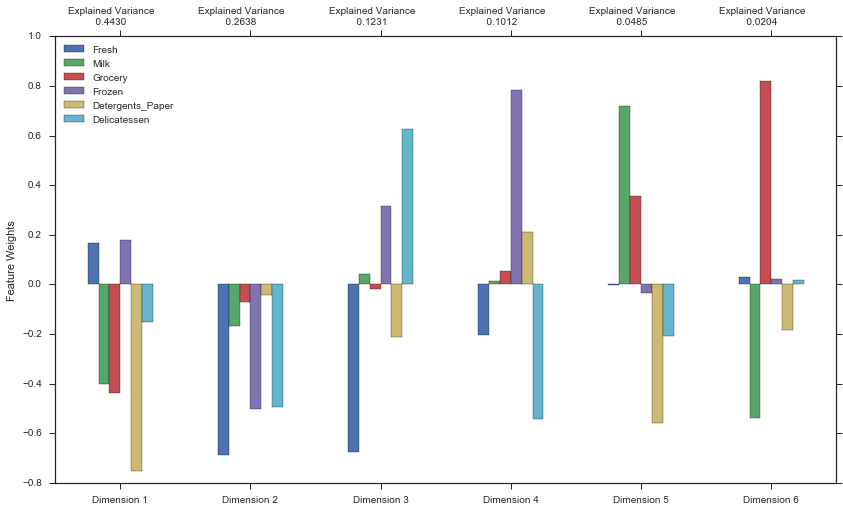

In [19]:
from sklearn.decomposition import PCA 

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns), random_state=randomstate) 
pca.fit(good_data) 

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

*The first 2 PCs explain 0.7068 of the data, which is a pretty good chance those dimensions represent 2 major market segments in which customers are organizing. *

*As for the first 4 PCs, the total explained variance is of 0.9311, comprising almost all the different ways in which customer behavior is operating. Intuitively, I would say those dimensions are tending to correspond to:*

| Dimension | Customer Behavior |
| --------- | ----------------- |
| 1 | *Businesses who sell cleaning products tend to also sell relatively long-lasting food products that can last for some time stored and won't require cooking when it is to be consumed, also adding a smaller volume of Delicatessen* |
| 2 | *Businesses who need Fresh and Frozen food are probably cooking for their clients, like restaurants, which also explain the Delicatessen purchases as they make good side products.* |
| 3 | *Businesses with heavy focus on Fresh food have a tendency to buy cleaning products as well, which would be very much in like with fast-foods and pizzarias.* |
| 4 | *Finally, businesses who specifically want to stock their Frozen supply are likely to not buy any PERISHABLE food. The correlated Detergents_Paper can be explained by purchases of baking sheets, butter sprays and things like that to help cook those Frozen products.* |

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
1,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
2,-4.3646,-3.9519,-0.1229,0.6240,0.5379,0.0551


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [21]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=randomstate)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

print "Log-adjusted good_data before PCA transformation"
print good_data.head(5)

print "------------"
print "good_data transformed by PCA, after formatted into a DataFrame"
print reduced_data.head(5)

print "------------"
print "Samples transformed by PCA"
print pca_samples

Log-adjusted good_data before PCA transformation
       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079      8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682      8.553525
------------
good_data transformed by PCA, after formatted into a DataFrame
   Dimension 1  Dimension 2
0    -1.757983     0.009711
1    -1.788665    -0.812251
2    -1.883353    -1.599135
3     1.155265    -1.405201
4    -0.784786    -2.394294
------------
Samples transformed by PCA
[[-2.18987905 -4.86045217]
 [-5.33156969 -1.88445282]
 [-4.3645541  -3.95185523]]


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [22]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.1899,-4.8605
1,-5.3316,-1.8845
2,-4.3646,-3.9519


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

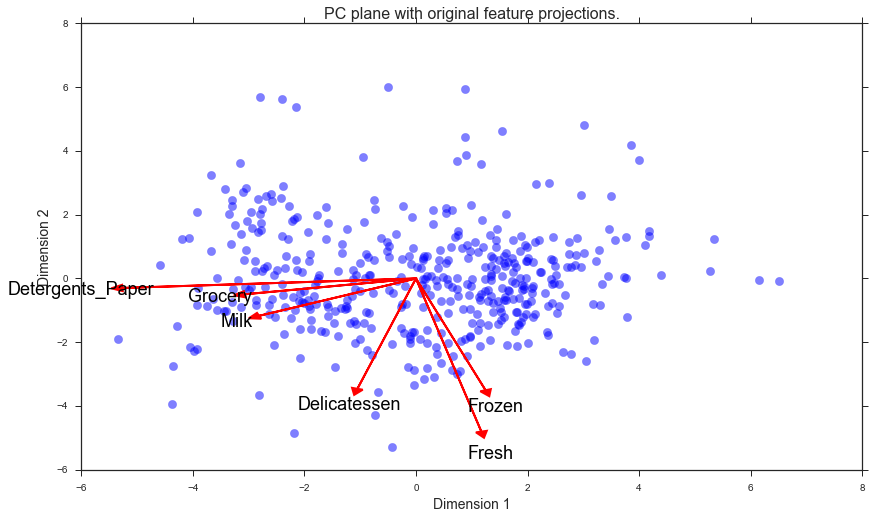

In [23]:
# Create a biplot
a = vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means** *assigns each data-point to one and only one cluster. It's a "hard cluster" procedure, good if we want to label and categorize our data-points in a more deterministic manner. Although it can lead data analysts and managers to eliminate subtle variations of behavior/parameters between data-points, the hard labeling can also make it much easier for the human mind to make sense of huge amounts of information.*

**Gaussian Mixtures** *yields probabilitic results where the algorithm determines, for each data-point, the likelihood that said point belong to each of the main clusters. So, if we have 6 clusters, each data-point would have a probability to belong to any of these. It's a "soft cluster" procedure, good if we want to have a general idea of how our data-points organize, but still preserving the subtleties of an imperfect world where every individual can have a little of this or that. The issue with it would be that probabilistic analysis can be counter-intuitive and hard to grasp for most people.*

*I believe the Gaussian Mixtures is potentially more interesting for this case - even after all the PCA transformations our data is still very much "all over the place", probably because in the food business there is quite some variation of business models. So while we are risking a somewhat harder communication with the wholesale client down the line, preserving the subtleties may help us to devise more "customized" algorithms to serve all said variation.*


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

np.set_printoptions(suppress=True) #supress prints in scientific notation for easier visualization of probabilities

n_comp_list = [2,3,4,5,6,7,8,9,10]
clusterer_list = []
preds_list = []
scores_list = []

for c in n_comp_list:
    clusterer_list.append(GaussianMixture(n_components=c, random_state=randomstate))
    clusterer_list[-1].fit(reduced_data)    
    preds_list.append(clusterer_list[-1].predict(reduced_data))    
    scores_list.append(silhouette_score(reduced_data, preds_list[-1], random_state=randomstate))

best_n_comp = scores_list.index(np.max(scores_list))     
print "-----------------"
print "List of possible Scores: "
print scores_list
print "Best score: "  + str(np.max(scores_list))
print "N-Component of Best score: " + str(best_n_comp)


# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = clusterer_list[best_n_comp]

# TODO: Predict the cluster for each data point
preds = preds_list[best_n_comp]
preds_proba = clusterer.predict_proba(reduced_data)

print "-----------------"
print "Cluster predictions: "
print preds[0:5]
print "-----------------"
print "Cluster probabilities: "
print preds_proba[0:5]


# TODO: Find the cluster centers
centers = clusterer.means_

print "-----------------"
print "Cluster means: "
print clusterer.means_


# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
sample_preds_proba = clusterer.predict_proba(pca_samples)

print "-----------------"
print "Sample cluster prediction: "
print sample_preds
print "-----------------"
print "Sample cluster prediction probabilities: "
print sample_preds_proba


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = scores_list[best_n_comp]

print "-----------------"
print "Silhouette score: "
print score


-----------------
List of possible Scores: 
[0.4219168464626149, 0.39555747454148177, 0.29789310899898636, 0.1957164784019999, 0.1949275581082584, 0.30233946013152846, 0.32426321272001879, 0.3268317519471145, 0.32777923043217644]
Best score: 0.421916846463
N-Component of Best score: 0
-----------------
Cluster predictions: 
[1 1 1 0 0]
-----------------
Cluster probabilities: 
[[ 0.14702986  0.85297014]
 [ 0.19921407  0.80078593]
 [ 0.2145795   0.7854205 ]
 [ 0.99416111  0.00583889]
 [ 0.70209212  0.29790788]]
-----------------
Cluster means: 
[[ 1.2512378  -0.18013806]
 [-2.22116886  0.31977698]]
-----------------
Sample cluster prediction: 
[1 1 1]
-----------------
Sample cluster prediction probabilities: 
[[ 0.10879324  0.89120676]
 [ 0.00202167  0.99797833]
 [ 0.01000723  0.98999277]]
-----------------
Silhouette score: 
0.421916846463


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

*I did a loop processing with an amount of clusters from 2 to 10. The best score was given by just 2 clusters. *

*I expected a certain variety in business models of this type of business, but since the silhouette score for 2 clusters is much higher than all the others - 0.42 against around 0.25-0.32 for the other possibilities.*

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

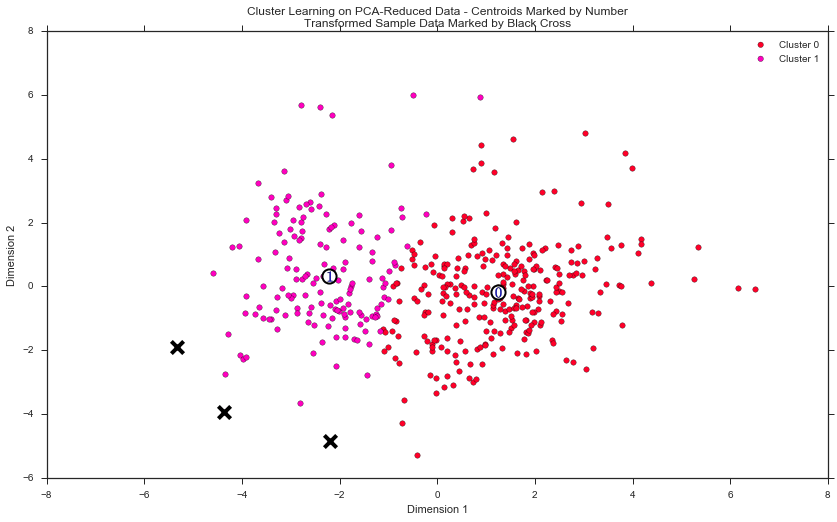

In [25]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


Log Centers: 
[[ 9.09977064  7.65620459  7.9247955   7.63775073  5.86644113  6.59583908]
 [ 8.1753591   8.96656316  9.41073802  6.7687055   8.45447984  6.86922078]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


--------------
Plotting normalized cluster expenditures:


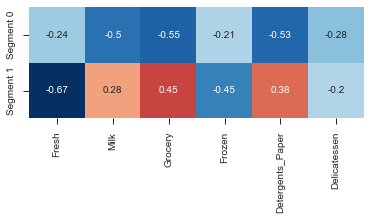

In [26]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)
print "Log Centers: "
print log_centers

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers) 

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

print "--------------"
print "Plotting normalized cluster expenditures:"
sns.heatmap((true_centers-data.mean())/data.std(ddof=1), annot=True, cbar=False, square=True)
plt.show()

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

| Segment | Notes |
| ------- | ----- |
| 0 | *This segment has Fresh and Frozen in the 3rd quartiles of the original dataset description, and the remaining features in the 2nd quartiles. The normalized expenditures points to a higher strength of these two features as well, plus Delicatessen. This information is  consistent with restaurants, fast-foods and other services alike. Another point to mention is that, since these 3 features are way below the mean, the cluster center points to most clients being small businesses with low volume.* |
| 1 | *The features of  Milk, Grocery and Detergents_Paper are up in the 4th quartiles, while the others are in the 2nd and  3rd quartiles. The normalized expenditures points to a higher strength of these three features as well, with Grocery in particular. This suggests supermarkets, convenience stores, pharmacies and the like, with strong presence on non-perishables. Also, worth mention, unlike Segment 0, the means for this segment suggests businesses bigger and with a higher volume, in average, that the initial statistical mean on its key features (Milk, Grocery and Detergents_Paper).  * |

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

*I expected those sample customers to have different profiles, but turns out they were much more alike and ended up the "supermarkets" segment. Form this learning, I should probably review the sampling method for the next analysis.*

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

*In order to run this A/B test, we should conduct them separately for each Segment. First, we sample a smaller pool of clients out of each Segment - say, 20% of them - and use the remaining 80% as Control groups. *

*The reason we conduct the test for each Segment is because the expenditures behavior and business model are distinct and be affected very differently. I would expect, for instance, that for Segment 1 a change in the delivery calendar may endanger Fresh and Delicatessen products to spoil while the business waits for the next deliver.*

*Also, testing a delivery schedule can affect the clients of our clients differenlty by Segment. In Segment 0, for instance, if by delivering Groceries only 3 times a week makes it so certain popular brands run out of stock more frequently, this creates problems that may have severe long-term consequences for the Retail businesses.*

*Given those considerations, with the results we are looking to test these hypothesis:*
- *Has the total amount of orders changed?*
- *Are there any decline on the volume of each individual orders over the days for the duration of the A/B test? (A decline from previous levels of the same customers could mean customers are buying from different sources.)*
- *Test for the null hypothesis: if negative or positive trends are found, is the same happening in the Control group? (Maybe these changes are due to some seasonality affecting everyone.)*

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

*Since we already have the clusters and labeled historic data, we can train a  Support Vector Machines or a Random Forest with all 6 features of the data. *

*From there, we can estimate in which cluster any new customer will belong. In other words, what we will try to predict as a target variable is whether the new customer belongs do segment 0, 1 or 2.*

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

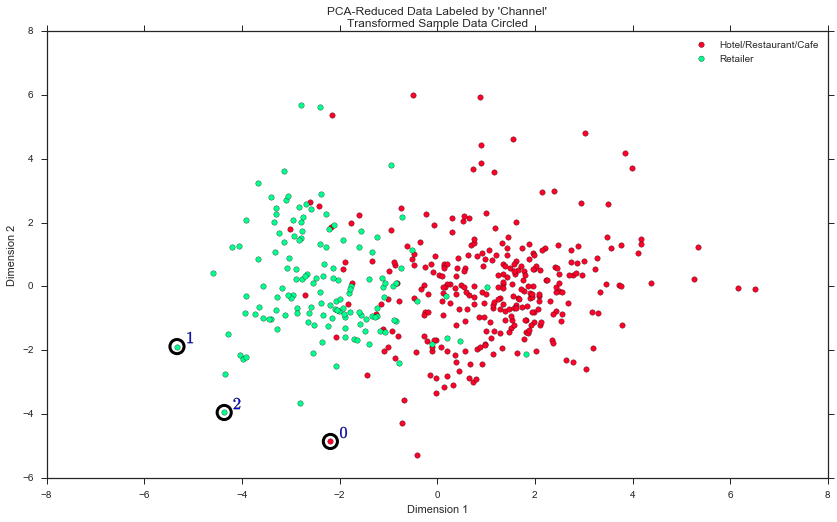

In [28]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

*Although I intentionally preferred to analyse 3 possible clusters instead of 2, which had a better Silhouette score, I can see from this later graphic that it would possibly be more productive to stick with just 2 clusters. Even if there are variations in the food business, splitting into Restaurant-like and Retailer-like generally makes sense and is generally coherent with segments 0, 1 and 2.*

*Segments 0 and 2 would tend to be classified as Hotel/Restaurant/Cafe and segment 1 as Retailer, but there is no pure correpondence, as the data classified above have green and red spots mixing together to an extend. *

*Nevertheless, these last classifications are generally consistent with the segments I predicted. *

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.